# 1\. Write a function that converts number representation 
(bin<->dec<->hex)

In [1]:
# Exercise 1
def convert(n, base_in, base_out):
    if (base_in == 'bin') : 
        if (base_out == 'bin') : return n
        elif (base_out == 'dec') : return str(int(n,2))
        elif (base_out == 'hex') : return hex(int(n,2))
    elif (base_in == 'dec') : 
        if (base_out == 'bin') : return bin(n)
        elif (base_out == 'dec') : return n
        elif (base_out == 'hex') : return hex(n)
    elif (base_in == 'hex') : 
        if (base_out == 'bin') : return bin(int(n,16))
        elif (base_out == 'dec') : return str(int(n,16))
        elif (base_out == 'hex') : return n
            
# Test the function: 
n = 42
b = '0b10111'
h = '0x1fa3'
print ("Test input format integer:")
print("We test this with the number 42. I know that's not very original")
bases = ['bin','dec','hex']
for baseout in bases :
    print (baseout, convert(n, 'dec', baseout))
print ()
print ('Test binary input with b = ', b)
for baseout in bases : 
    print (baseout, convert(b, 'bin', baseout))
print ()
print ('Test hex input with h = ', h)
for baseout in bases : 
    print (baseout, convert(h, 'hex', baseout))

Test input format integer:
We test this with the number 42. I know that's not very original
bin 0b101010
dec 42
hex 0x2a

Test binary input with b =  0b10111
bin 0b10111
dec 23
hex 0x17

Test hex input with h =  0x1fa3
bin 0b1111110100011
dec 8099
hex 0x1fa3


### 2\. Write a function that converts a 32 bit word into a single precision floating point 
(i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
# Exercise 2 - Convert 32 bit-Word into  single precision float
def StringToFloat(s):
    b = ''.join(format(ord(x), 'b') for x in s)
    if (len(b) < 32):
        print('Word must be at least 32 bits')
        return 1
    elif (len(b) > 32):
        b = b[:32]
    f = float(eval('0b'+str(b)))
    return f

# Testing this function
s = 'Hello World'
print (StringToFloat(s))

2442618573.0


### 3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
# Exercise 3 - Find Overflow und Underflow

def FindOverFlow():
    x = 1.0
    while (str(2*x) != 'inf'): 
        x*=2
    print ('Overflow:',x)
    
def FindUnderFlow():
    x = 1.0
    while (x/2 != 0):
        x/=2
    print ('Underflow:',x)
    
FindOverFlow()
FindUnderFlow()

Overflow: 8.98846567431158e+307
Underflow: 5e-324


### 4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [4]:
# Exercise 4 - Find Machine Precision

def FindPrecision():
    x = 1.0
    n = 0
    while (x + 10**n != x):
        n-=1
    print ('Machine Precision:',10**n)
    
FindPrecision()

# Check whether this is true: 
print ('\nTesting the machine precision:')
print ('1 + 1e-15 =',1 + 1e-15)
print ('1 + 1e-16 =',1 + 1e-16)

Machine Precision: 1e-16

Testing the machine precision:
1 + 1e-15 = 1.000000000000001
1 + 1e-16 = 1.0


### 5\. Quadratic Equation
Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
# Exercise 5 - Quardatic Function
from math import sqrt

def SolveQuadraticEquation1(a,b,c):
    d = b**2 - 4*a*c
    return (-b + sqrt(d))/(2*a), (-b - sqrt(d))/(2*a)

def SolveQuadraticEquation2(a,b,c):
    det = sqrt(b**2 - 4*a*c)
    mult1 = -b - det
    mult2 = -b + det
    top1 = (-b + det) * mult1
    bot1 = 2*a*mult1
    top2 = (-b - det) * mult2
    bot2 = 2*a*mult2
    x1 = top1/bot1
    x2 = top2/bot2
    return x1, x2

def SolveQuadraticEquation3(a,b,c):
    d = b**2 - 4*a*c
    return (2*c)/(-b - sqrt(d)), (2*c)/(-b + sqrt(d))


def CorrectlySolveQuadraticEquation(a,b,c):
    '''
    We now want to avoid catastrophic cancellation
    i.e avoid the term -b + sqrt(d) 
    To do this, we use a combination of Version1 and Version3
    '''
    d = b**2 - 4*a*c
    return (2*c)/(-b - sqrt(d)),(-b - sqrt(d))/(2*a)
    
print (SolveQuadraticEquation1(0.001,1000.0,0.001))
print (SolveQuadraticEquation2(0.001,1000.0,0.001))
print (SolveQuadraticEquation3(0.001,1000.0,0.001))
print (CorrectlySolveQuadraticEquation(0.001,1000.0,0.001))

(-9.999894245993346e-07, -999999.999999)
(-9.999894245993346e-07, -999999.9999990001)
(-1.000000000001e-06, -1000010.5755125057)
(-1.000000000001e-06, -999999.999999)


# The 3rd version here uses the different solution 
$$ x_{1,2} = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$
We are lucky that one of the solutions of the normal solution and one of this alternative solution is numerically stable

### 6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [6]:
# Exercise 6 - Derivative of a function

def f(x):
    f = x*(x+1)
    return f

def truefprime(x):
    fprime = 2*x + 1
    return fprime

def approxfprime(x, delta=1e-2):
    fprime = (f(x+delta) - f(x))/delta
    return fprime

print ("f'(x=1) calculated analytically:",truefprime(1))
print ("f'(x=1) approximated numerically:", approxfprime(1))
print ()
    
deltas = [1e-2,1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]

for delta in deltas:
    accuracy = abs(truefprime(1) - approxfprime(1,delta))
    print ("delta:", delta, "accuracy:", accuracy)
    print ("accuracy/delta:", accuracy/delta)
    print ()

f'(x=1) calculated analytically: 3
f'(x=1) approximated numerically: 3.0100000000000016

delta: 0.01 accuracy: 0.010000000000001563
accuracy/delta: 1.0000000000001563

delta: 0.0001 accuracy: 9.999999684140448e-05
accuracy/delta: 0.9999999684140448

delta: 1e-06 accuracy: 1.0000641452734271e-06
accuracy/delta: 1.0000641452734271

delta: 1e-08 accuracy: 1.823241291276645e-08
accuracy/delta: 1.823241291276645

delta: 1e-10 accuracy: 2.482211129972711e-07
accuracy/delta: 2482.211129972711

delta: 1e-12 accuracy: 0.00026670174702303484
accuracy/delta: 266701747.02303484

delta: 1e-14 accuracy: 0.02460229400458047
accuracy/delta: 2460229400458.0474



The accuracy scales linear with $\delta$ until roughly $\delta \approx 10^{-8}$ then accuracy starts to deterioate the reason for this probably is the machine precision. 

### 7\. Numerical Integral
Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [7]:
import math
import matplotlib.pyplot as plt

def y(x):
    y = sqrt(1-x**2)
    return y

def Riemann(y,xlow,xhigh,N):
    I = 0
    step = (xhigh - xlow)/N
    for i in range(int(N)):
        I += y(xlow+i*step)
    return 2/N * I

Ns = [1e2,1e3,1e4,1e5,1e6]
accuracies = []
Iexact = math.pi/2

for N in Ns:
    %timeit Riemann(y,-1.0,1.0,N)
    I = Riemann(y,-1.0,1.0,N)
    accuracy = abs(I - Iexact)
    accuracies.append(accuracy)
    print ('N', N, 'Accuracy', accuracy, 'N*accuracy', accuracy*N,'\n')


19.8 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
N 100.0 Accuracy 0.001662071245646768 N*accuracy 0.1662071245646768 

204 µs ± 5.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
N 1000.0 Accuracy 5.2588293825595045e-05 N*accuracy 0.052588293825595045 

2.06 ms ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
N 10000.0 Accuracy 1.6630796102479195e-06 N*accuracy 0.016630796102479195 

20.7 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
N 100000.0 Accuracy 5.259148228020649e-08 N*accuracy 0.005259148228020649 

209 ms ± 8.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
N 1000000.0 Accuracy 1.662961768289506e-09 N*accuracy 0.001662961768289506 



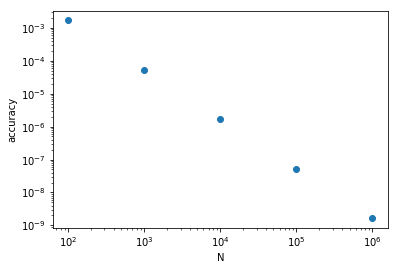

In [8]:
%matplotlib inline

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('accuracy')
plt.plot(Ns, accuracies, 'o')

 - We can see, that the accurcay scales a bit better than linear with N. Increasing N by four orders of magnitudes yields six orders of magnitude improvements in the accuracy.
 $$ Accuracy \approx N^{\frac{3}{2}} $$
 
- Computing time scales linear with N. this means, that $N=10^6$ is the last step that takes less than a second with $t \approx 200 ms$ and an accuracy of $1.7 \cdot 10^{-9}$

- The last step that will be done within less than one minute will be for $N=10^8$ which will have an accuracy of about $1.7 \cdot 10^{-12}$